In [1]:
import os

In [2]:
os.chdir('../..')

In [3]:
import tensorflow as tf

In [10]:
from importlib import reload

In [11]:
reload(da)

<module 'dev.python.utils.data_augmentation' from '/home/app/dev/python/utils/data_augmentation.py'>

# Prep

## Loading Model

In [4]:
# @keras.utils.register_keras_serializable
model = tf.keras.models.load_model('data/model/TinyYolo_610')

## Load img

In [5]:
import cv2
import dev.python.utils.data_augmentation as da
import PIL
import PIL.Image as Image
import numpy as np
import random

In [6]:
import imgaug as ia
import imgaug.augmenters as iaa

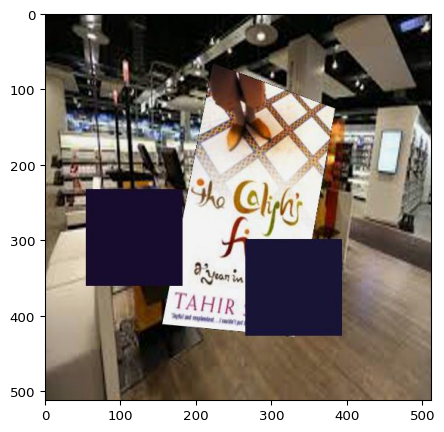

In [7]:
augmented_img_dir = 'data/output/tests/augmented_covers/'
augmented_img_file = os.listdir(augmented_img_dir)[0]
augmented_img_path = augmented_img_dir+augmented_img_file
augmented_img = cv2.imread(augmented_img_path)
ia.imshow(augmented_img[:, :, ::-1])

# Eval

In [14]:
im, points = da.read_augmented_img_filename(augmented_img_path)
im, points

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F201C715860>,
 array([[222,  67],
        [384, 126],
        [155, 412],
        [330, 428]]))

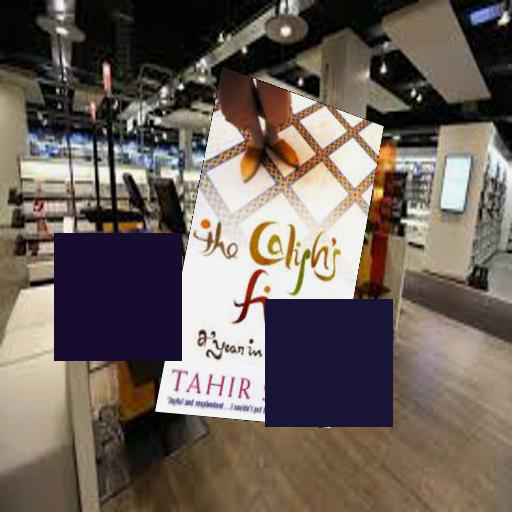

In [15]:
im

In [19]:
im_t = da.draw_circles(np.array(im), points)
im_t.shape

(512, 512, 3)

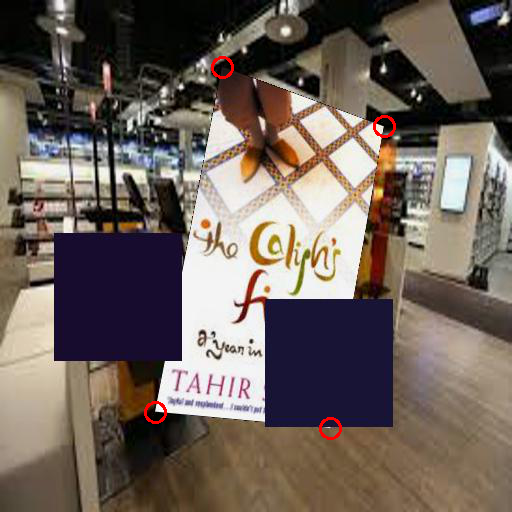

In [20]:
Image.fromarray(im_t)

## Pred

In [24]:
im_in = np.array(im).reshape(1, 512, 512, 3)
im_in.shape

(1, 512, 512, 3)

In [37]:
im_in_t = np.repeat(im_in, repeats=64, axis=0)
im_in_t.shape

(64, 512, 512, 3)

In [ ]:
model(im_in_t/255)

In [42]:
im_out_t1, im_out_t2 = model(im_in_t/255)
im_out_t1.shape, im_out_t2.shape

(TensorShape([64, 9]), TensorShape([64, 9]))

In [50]:
p = (im_out_t1.numpy()[1][:8]*512).astype(np.uint8).reshape(4, 2)
p

array([[ 14,  34],
       [255, 110],
       [  0, 124],
       [221, 164]], dtype=uint8)

In [51]:
im_t = da.draw_circles(np.array(im), p)
im_t.shape

(512, 512, 3)

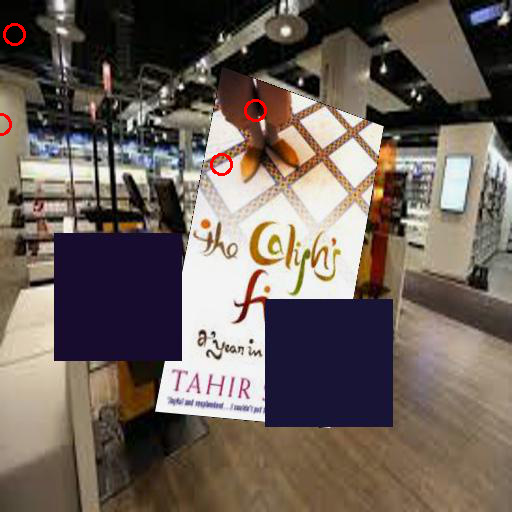

In [52]:
Image.fromarray(im_t)